최적화 할 함수 = F1
최적 위치 : [2.05145618 4.3376177 ]
최적 적합도 : 0.0005026533324095761
위치 오차 : 0.3415164002958593
적합도 오차 : 0.0005026533324095761




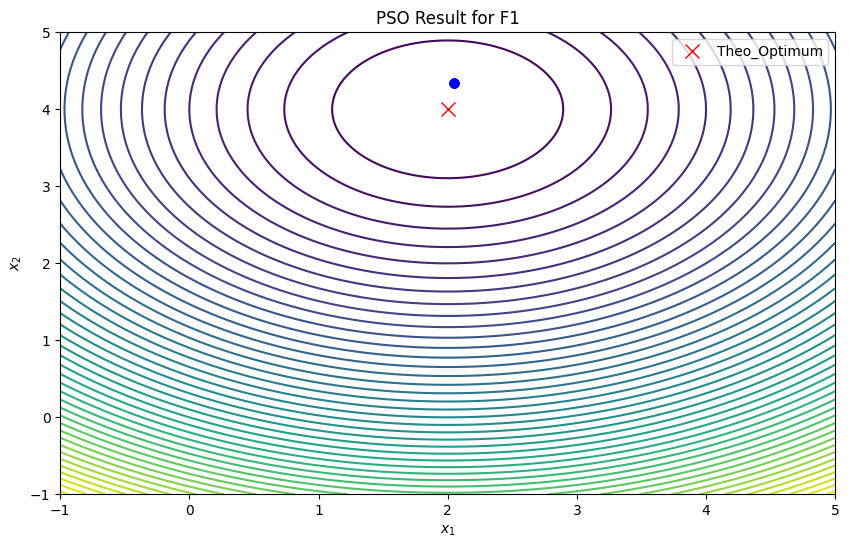

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 변수값
Particle_num = 50 # 입자 수
MaxT = 500  # 최대 반복 횟수
D = 2 # object F 에서 변수가 2개 이므로 차원을 2개로 설정함

# 입자 클래스 정의
class Particle:
    def __init__(self, position):
        self.position = position   #입자의 현재 위치 = position
        self.velocity = np.zeros_like(position) # 입자의 현재 속도 = velocity
        self.best_position = position # 입자의 개인 최적 위치 = best_position
        self.best_fitness = float('inf') # 입자의 개인 최적 적합도 = best_fitness

# PSO 정의
def PSO(ObjF, Particle_num, D, MaxT):
    swarm_best_position = None  #군집의 최적 위치 ( 일단 아직 없음 )
    swarm_best_fitness = float('inf') #군집의 최적 적합도
    particles = [] #입자=리스트로 초기화

    # 알고리즘 초기화
    for _ in range(Particle_num):  #Particle_num만큼 반복하여 입자 초기화 / 종속되는 변수없이 반복문을 실행하기 위해  _ 사용했음.
        position = np.random.uniform(-1, 4, D)  # 초기 위치 범위를 좁힘 -1~4사이에서 랜덤하게
        particle = Particle(position) # 새 입자 paricle 생성
        particles.append(particle) # 입자 리스트 particles에 위에서 만든 새 입자 particle 을 추

        # 최적값 업데이트
        fitness = ObjF(position) # 입자의 현재 위치에서의 적합도 계산
        if fitness < swarm_best_fitness: # 입자의 적합도가 군집의 최적 적합도보다 작으면 업데이트
            swarm_best_fitness = fitness
            swarm_best_position = position

        particle.best_position = position # 입자의 개인 최적 위치 설정
        particle.best_fitness = fitness # 입자의 개인 최적 적합도 설

    # PSO 알고리즘 메인 루프
    for itr in range(MaxT):   # MaxT 만큼 반복
        for particle in particles:
            # 속도 업데이트
            w = 0.5  # 관성 계수
            c1 = 1.5  # P 계수
            c2 = 1.5  # S 계수

            r1 = random.random() # 0~ 1사이
            r2 = random.random()

            # 속도 계산
            particle.velocity = (w * particle.velocity +   # particle 속도 항
                                 c1 * r1 * (particle.best_position - particle.position) + # P 항
                                 c2 * r2 * (swarm_best_position - particle.position)) # S 항
            # 위치 업데이트
            particle.position += particle.velocity # i번째 입자의 다음 위치 = 위치 + 다음속도

            # 목적 함수 평가
            fitness = ObjF(particle.position)  # 업데이트한 위치에서의 적합도 계산

            # 입자 최적값 업데이트
            if fitness < particle.best_fitness: # 현재 입자의 최적값이 입자의 개인 최적 적합도보다 작으면 업데이트
                particle.best_fitness = fitness
                particle.best_position = particle.position

            # 군집 최적값 업데이트
            if fitness < swarm_best_fitness: # 현재 입자의 최적값이 군집의 최적 적합도보다 작으면 업데이트
                swarm_best_fitness = fitness
                swarm_best_position = particle.position



    return particles, swarm_best_position, swarm_best_fitness  #결과 반환 ( 입자 배열, 군집 최적 위치, 군집 최적 적합도)
    # 나중에 PSO 호출할때 사용


# 목적 함수 정의
def F1(x):
    # x[0]은 x1에 해당, x[1]은 x2에 해당
    return (x[0] - 2)**2 + (x[1] - 4)**2  # 2차원의 목적 함수

Objective_Function = {
    'F1': F1,
}

# 이론적 최적값
theoretical_best_position = np.array([2, 4]) # 이론적인 최적 위치
theoretical_best_fitness = 0 # 이론적인 최적 적합도 = ( 적합도가 작을수록 최적 )

# 목적 함수 반복, PSO 실행 및 이론적 최적값 비교
for funName, ObjF in Objective_Function.items():
    Output = "최적화 할 함수 = " + funName + "\n"
    particles, best_position, best_fitness = PSO(ObjF, Particle_num, D, MaxT) #PSO 실행
    Output += "최적 위치 : " + str(best_position) + "\n"
    Output += "최적 적합도 : " + str(best_fitness) + "\n"

    # 이론적 최적값과 비교
    position_error = np.linalg.norm(best_position - theoretical_best_position) #넘파이의 유클리드 거리 공식 구현 함수(linalg.norm) /  위치 오차 계산
    fitness_error = abs(best_fitness - theoretical_best_fitness) # 적합도 오차 계산
    Output += "위치 오차 : " + str(position_error) + "\n" #위치 오차 출력
    Output += "적합도 오차 : " + str(fitness_error) + "\n" # 적합도 오차 출력
    Output += "\n"

    print(Output)

    # 입자들의 최종 위치 시각화
    plt.figure(figsize=(10, 6))
    x1 = np.linspace(-1, 5, 400)
    x2 = np.linspace(-1, 5, 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = (X1 - 2)**2 + (X2 - 4)**2    #목적 함수의 등고선 계산

    plt.contour(X1, X2, Z, levels=50)  # 등고선 그리
    plt.plot(2, 4, 'rx', markersize=10, label='Theo_Optimum') # 이론적 최적 위치 표시

    for particle in particles:
        plt.plot(particle.position[0], particle.position[1], 'bo') #입자 위치 표

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.title(f'PSO Result for {funName}')
    plt.show()  #플롯 출력



In [ ]:
from pyMetaheuristic.algorithm import particle_swarm_optimization as pso
from pyMetaheuristic.problem import graphs
#쓰는 방법도 있는데 이거는 나중에 간단하게 해보자